# Breast Cancer Detection - Wisconsin Breast Cancer Dataset

#### Project Description

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign (non cancerous).

### 1. Importing the libraries

A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [1]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Modelling 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

### Tabulating the results

from tabulate import tabulate

### Model Validation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### 2. Importing the data

This data was donated by researchers of the University of Wisconsin and includes the measurements from digitized images of fine-needle aspirate of a breast mass.

The breast cancer data includes 569 examples of cancer biopsies, each with 32 features. One feature is an identification number, another is the cancer diagnosis and 30 are numeric-valued laboratory measurements.
The diagnosis is coded as "M" to indicate malignant or "B" to indicate benign.

The other 30 numeric measurements comprise the mean, standard error and worst (i.e. largest) value for 10 different characteristics of the digitized cell nuclei, which are as follows:-

1. Radius
2. Texture
3. Perimeter
4. Area
5. Smoothness
6. Compactness
7. Concavity
8. Concave Points
9. Symmetry
10. Fractal dimension

In [2]:
### Fetching the dataset

dataset = pd.read_csv('../Datasets/breast-cancer.csv')

In [3]:
### Looking at the sample data in the dataset

dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
### Shape of the dataset

dataset.shape

(569, 32)

The dataset consists of 32 columns and 569 rows.

In [5]:
### Checking if the dataset is balanced or not

labels = ['Has Breast Cancer', 'Does not have Breast Cancer']
values = [len(dataset[dataset['diagnosis'] == 'M']), len(dataset[dataset['diagnosis'] == 'B'])] 

print('Percentage of people having breast cancer: {}'.format(round((values[0] * 100)/sum(values), 2)))
print('Percentage of people not having breast cancer: {}'.format(round((values[1] * 100)/sum(values), 2)))

Percentage of people having breast cancer: 37.26
Percentage of people not having breast cancer: 62.74


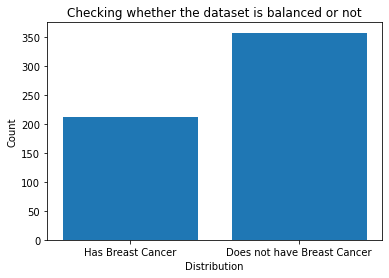

In [6]:
### Plotting the graph - to check if the dataset is balanced or not

plt.title('Checking whether the dataset is balanced or not')
plt.xlabel('Distribution')
plt.ylabel('Count')
plt.bar(labels, values)
plt.show()

From the above graph, we can see that the data is slightly unbalanced.

### 3. Data Preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Datatypes, Missing Data, and Summary Statistics
2. Drop unnecessary columns
3. Data Transformation
4. Feature encoding 

#### 3.1 Datatypes, Missing Data, and Summary Statistics

In [7]:
### Looking at the datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Here, the column - diagnosis is categorical. Hence, we modify the datatype of these columns to category.

In [8]:
### Changing the datatype of the column - dignosis in the dataset 

dataset.diagnosis = dataset.diagnosis.astype('category')

Looking at the modified datatypes of the columns in the dataset.

In [9]:
### Looking at the modified datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

From the above data, we can see that the datatype of the column - diagnosis has changed from object to category.

In [10]:
### Missing data by columns in the dataset

dataset.isnull().sum().sort_values(ascending = False)

id                         0
diagnosis                  0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
compactness_se             0
smoothness_se              0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
fractal_dimension_worst    0
dtype: int64

From the above data, it is evident that there are no missing values in the dataset.

<AxesSubplot:>

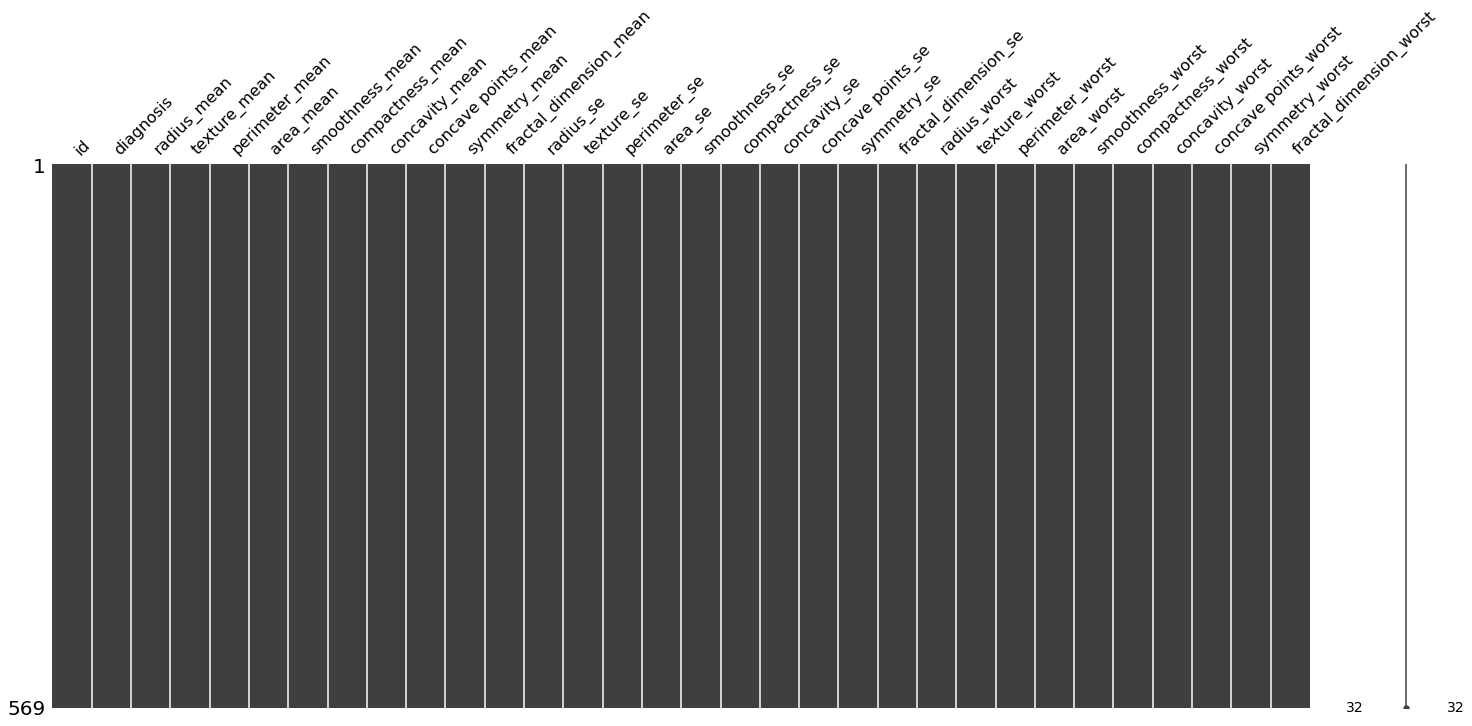

In [11]:
### Visual representation of the data in the dataset

missingno.matrix(dataset)

In [12]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 3.2 Drop unnecessary columns 

From the given dataset, we can see that the column id is a counter variable. Hence, we will drop the column - id.

In [13]:
### Drop the column - id

dataset.drop(['id'], axis = 1, inplace = True)
dataset.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


#### 3.3 Data Transformation

In this section, we will transform the data using min max scaling. Min-Max scaling also known as min-max scaling or min-max normalization, rescaling is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.

Here, we will scale the data to a range of [0, 1]. 

In [14]:
### A function to perform min-max scaling

def min_max_scaling(dataset, column):
    data = list(dataset[column])
    new_data = [(value - min(data))/(max(data) - min(data)) for value in data]
    dataset[column] = new_data

In [15]:
### Scaling all the numerical columns 

columns = list(dataset.columns)
numerical_columns = columns[1 : ]

for each_column in numerical_columns:
    min_max_scaling(dataset, each_column)
    
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


#### 3.4 Feature Encoding

In the dataset, we have one categorical column - diagnosis (target variable). Here, the value 'M' means malignant and 'B' means benign. A benign tumor has distinct, smooth, regular borders. A malignant tumor has irregular borders and grows faster than a benign tumor. A malignant tumor can also spread to other parts of your body. A benign tumor can become quite large, but it will not invade nearby tissue or spread to other parts of your body.

Here, we will use 0-1 encoding such that M means 1 and B means 0.

In [16]:
### Encoding the target column - diagnosis

target_column = dataset['diagnosis']
encoded_target = [0 if value == 'B' else 1 for value in target_column]
encoded_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [17]:
### Modifying the target column of the dataset

dataset['diagnosis'] = encoded_target
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### 4. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Breast Cancer Detection is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

Logistic regression
Support vector classification
K-nearest neighbours
Naive Bayes
Decision tree
Random forest

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. 

#### 4.1 Splitting the data into Training and Test sets

In [18]:
### Splitting the data into independent and dependent matrices - X and Y

X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values

In [19]:
### Looking at the independent matrix X

X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [20]:
### Looking at the dependent matrix Y

Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [21]:
### Dividing the data into training and test sets in the ratio of 80:20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 27)

In [22]:
X_train

array([[0.9578778 , 0.4112276 , 0.95577362, ..., 0.92371134, 0.25448453,
        0.16909353],
       [0.6682285 , 0.36557322, 0.65171723, ..., 0.78350515, 0.13857678,
        0.12600026],
       [0.41975484, 0.48156916, 0.41400041, ..., 0.38453608, 0.24521979,
        0.05135773],
       ...,
       [0.23044157, 0.26208996, 0.21940433, ..., 0.31408935, 0.30277942,
        0.09858323],
       [0.29480808, 0.62056138, 0.2839472 , ..., 0.27347079, 0.17898679,
        0.06158993],
       [0.31042643, 0.15725397, 0.30177597, ..., 0.44261168, 0.27833629,
        0.11511216]])

In [23]:
X_test

array([[0.27398362, 0.39567129, 0.26418354, ..., 0.16402062, 0.12103292,
        0.08966286],
       [0.20961711, 0.03753805, 0.20420151, ..., 0.30783505, 0.28602405,
        0.19801915],
       [0.64219793, 0.37707136, 0.64964412, ..., 0.73814433, 0.29804849,
        0.13544536],
       ...,
       [0.16986133, 0.29117349, 0.15914588, ..., 0.07635739, 0.22353637,
        0.08080808],
       [0.1930522 , 0.25059182, 0.18975883, ..., 0.32694158, 0.23950325,
        0.40508986],
       [0.13128875, 0.62529591, 0.12362656, ..., 0.16721649, 0.14902425,
        0.11196379]])

In [24]:
Y_train

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [25]:
Y_test

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0], dtype=int64)

#### 4.2 Fit Model

In this section, we use various machine learning models to predict the results for our sample test data (X_test). Based on the performance of each model, we select one best model based on the model's accuracy. We will store the model and its accuracy so that we can tabulate them later for choosing the best model.

In [26]:
### Dictionary to store model and its accuracy

model_accuracy = OrderedDict()

In [27]:
### Dictionary to store model and its recall

model_recall = OrderedDict()

##### 4.2.1 Applying Logistic Regression

In [28]:
### Training the Logistic Regression model on the dataset

logistic_classifier = LogisticRegression(random_state = 27)
logistic_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=27)

In [29]:
### Predicting the Test set results

Y_pred = logistic_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [30]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

logistic_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Logistic Regression'] = logistic_accuracy

logistic_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Logistic Regression'] = logistic_recall

print('The accuracy of this model is {} %.'.format(logistic_accuracy))
print('The recall of this model is {} %.'.format(logistic_recall))

[[69  0]
 [ 3 42]]
The accuracy of this model is 97.37 %.
The recall of this model is 93.33 %.


##### 4.2.2 Applying Support Vector Classification - Linear

In [31]:
### Applying Linear SVM Classification model

linear_svm_classifier = SVC(kernel = 'linear', random_state = 27)
linear_svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=27)

In [32]:
### Predicting the Test set results

Y_pred = linear_svm_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [33]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

linear_svm_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Linear SVM'] = linear_svm_accuracy

linear_svc_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Linear SVM'] = linear_svc_recall

print('The accuracy of this model is {} %.'.format(linear_svm_accuracy))
print('The recall of this model is {} %.'.format(linear_svc_recall))

[[69  0]
 [ 3 42]]
The accuracy of this model is 97.37 %.
The recall of this model is 93.33 %.


##### 4.2.3 Applying Support Vector Classification - Kernel

In [34]:
### Applying Kernel SVM Classification model

kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 27)
kernel_svm_classifier.fit(X_train, Y_train)

SVC(random_state=27)

In [35]:
### Predicting the Test set results

Y_pred = kernel_svm_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [36]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

kernel_svm_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Kernel SVM'] = kernel_svm_accuracy

kernel_svm_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Kernel SVM'] = kernel_svm_recall

print('The accuracy of this model is {} %.'.format(kernel_svm_accuracy))
print('The recall of this model is {} %.'.format(kernel_svm_recall))

[[69  0]
 [ 2 43]]
The accuracy of this model is 98.25 %.
The recall of this model is 95.56 %.


##### 4.2.4 Applying K-Nearest Neighbors (1-NN)

In [37]:
### Applying 1NN model

classifier_1nn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_1nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
### Predicting the Test set results

Y_pred = classifier_1nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [39]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

classifier_1nn_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K - Nearest Neighbors (1 NN)'] = classifier_1nn_accuracy

classifier_1nn_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['K - Nearest Neighbors (1 NN)'] = classifier_1nn_recall

print('The accuracy of this model is {} %.'.format(classifier_1nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_1nn_recall))

[[66  3]
 [ 3 42]]
The accuracy of this model is 94.74 %.
The recall of this model is 93.33 %.


##### 4.2.5 Applying K-Nearest Neighbors (3-NN)

In [40]:
### Applying 3NN model

classifier_3nn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_3nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
### Predicting the Test set results

Y_pred = classifier_3nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [42]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

classifier_3nn_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K - Nearest Neighbors (3 NN)'] = classifier_3nn_accuracy

classifier_3nn_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['K - Nearest Neighbors (3 NN)'] = classifier_3nn_recall

print('The accuracy of this model is {} %.'.format(classifier_3nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_3nn_recall))

[[68  1]
 [ 2 43]]
The accuracy of this model is 97.37 %.
The recall of this model is 95.56 %.


##### 4.2.6 Applying K-Nearest Neighbors (5-NN)

In [43]:
### Applying 5NN model

classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_5nn.fit(X_train, Y_train)

KNeighborsClassifier()

In [44]:
### Predicting the Test set results

Y_pred = classifier_5nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [45]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

classifier_5nn_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K - Nearest Neighbors (5 NN)'] = classifier_5nn_accuracy

classifier_5nn_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['K - Nearest Neighbors (5 NN)'] = classifier_5nn_recall

print('The accuracy of this model is {} %.'.format(classifier_5nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_5nn_recall))

[[68  1]
 [ 2 43]]
The accuracy of this model is 97.37 %.
The recall of this model is 95.56 %.


##### 4.2.7 Applying K-Nearest Neighbors (7-NN)

In [46]:
### Applying 7NN model

classifier_7nn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_7nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
### Predicting the Test set results

Y_pred = classifier_7nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [48]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

classifier_7nn_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K - Nearest Neighbors (7 NN)'] = classifier_7nn_accuracy

classifier_7nn_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['K - Nearest Neighbors (7 NN)'] = classifier_7nn_recall

print('The accuracy of this model is {} %.'.format(classifier_7nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_7nn_recall))

[[68  1]
 [ 2 43]]
The accuracy of this model is 97.37 %.
The recall of this model is 95.56 %.


##### 4.2.8 Applying K-Nearest Neighbors (9-NN)

In [49]:
### Applying 9NN model

classifier_9nn = KNeighborsClassifier(n_neighbors = 9, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_9nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [50]:
### Predicting the Test set results

Y_pred = classifier_9nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [51]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

classifier_9nn_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K - Nearest Neighbors (9 NN)'] = classifier_9nn_accuracy

classifier_9nn_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['K - Nearest Neighbors (9 NN)'] = classifier_9nn_recall

print('The accuracy of this model is {} %.'.format(classifier_9nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_9nn_recall))

[[68  1]
 [ 4 41]]
The accuracy of this model is 95.61 %.
The recall of this model is 91.11 %.


##### 4.2.9 Applying K-Nearest Neighbors (11-NN)

In [52]:
### Applying 11NN model

classifier_11nn = KNeighborsClassifier(n_neighbors = 11, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_11nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [53]:
### Predicting the Test set results

Y_pred = classifier_11nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [54]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

classifier_11nn_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K - Nearest Neighbors (11 NN)'] = classifier_11nn_accuracy

classifier_11nn_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['K - Nearest Neighbors (11 NN)'] = classifier_11nn_recall

print('The accuracy of this model is {} %.'.format(classifier_11nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_11nn_recall))

[[68  1]
 [ 5 40]]
The accuracy of this model is 94.74 %.
The recall of this model is 88.89 %.


Now let's plot the accuracies of all the nearest neighbor models. We can see that the accuracy first increases, reaches a peak and then decreases.

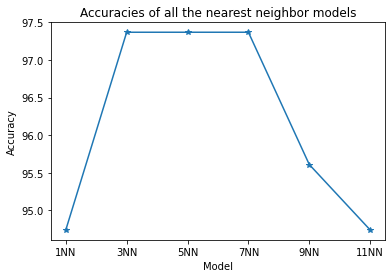

In [55]:
### Looking at the accuracy graph of all the nearest neighbors

labels = ['1NN', '3NN', '5NN', '7NN', '9NN', '11NN']
values = [classifier_1nn_accuracy, classifier_3nn_accuracy, classifier_5nn_accuracy, 
          classifier_7nn_accuracy, classifier_9nn_accuracy, classifier_11nn_accuracy]

plt.title('Accuracies of all the nearest neighbor models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.plot(labels, values, '*-')
plt.show()

##### 4.2.10 Applying Gaussian Naive Bayes Classification

In [56]:
### Applying Naive Bayes Classification model

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [57]:
### Predicting the Test set results

Y_pred = naive_bayes_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [58]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

naive_bayes_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Gaussian Naive Bayes'] = naive_bayes_accuracy

naive_bayes_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Gaussian Naive Bayes'] = naive_bayes_recall

print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The recall of this model is {} %.'.format(naive_bayes_recall))

[[68  1]
 [ 4 41]]
The accuracy of this model is 95.61 %.
The recall of this model is 91.11 %.


##### 4.2.11 Applying Decision Tree Classification

In [59]:
### Applying Decision Tree Classification model

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=27)

In [60]:
### Predicting the Test set results

Y_pred = decision_tree_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [61]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

decision_tree_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Decision Tree Classification'] = decision_tree_accuracy

decision_tree_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Decision Tree Classification'] = decision_tree_recall

print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The recall of this model is {} %.'.format(decision_tree_recall))

[[63  6]
 [ 3 42]]
The accuracy of this model is 92.11 %.
The recall of this model is 93.33 %.


##### 4.2.12 Applying Random Forest Classification (10 trees)

In [62]:
### Applying Random Forest Classification model (10 trees)

random_forest_10_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 27)
random_forest_10_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=27)

In [63]:
### Predicting the Test set results

Y_pred = random_forest_10_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [64]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

random_forest_10_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest Classification (10 trees)'] = random_forest_10_accuracy

random_forest_10_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Random Forest Classification (10 trees)'] = random_forest_10_recall

print('The accuracy of this model is {} %.'.format(random_forest_10_accuracy))
print('The recall of this model is {} %.'.format(random_forest_10_recall))

[[67  2]
 [ 4 41]]
The accuracy of this model is 94.74 %.
The recall of this model is 91.11 %.


##### 4.2.13 Applying Random Forest Classification (25 trees)

In [65]:
### Applying Random Forest Classification model (25 trees)

random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
random_forest_25_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=27)

In [66]:
### Predicting the Test set results

Y_pred = random_forest_25_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [67]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

random_forest_25_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest Classification (25 trees)'] = random_forest_25_accuracy

random_forest_25_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Random Forest Classification (25 trees)'] = random_forest_25_recall

print('The accuracy of this model is {} %.'.format(random_forest_25_accuracy))
print('The recall of this model is {} %.'.format(random_forest_25_recall))

[[68  1]
 [ 3 42]]
The accuracy of this model is 96.49 %.
The recall of this model is 93.33 %.


##### 4.2.14 Applying Random Forest Classification (50 trees)

In [68]:
### Applying Random Forest Classification model (50 trees)

random_forest_50_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_50_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=27)

In [69]:
### Predicting the Test set results

Y_pred = random_forest_50_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [70]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

random_forest_50_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest Classification (50 trees)'] = random_forest_50_accuracy

random_forest_50_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Random Forest Classification (50 trees)'] = random_forest_50_recall

print('The accuracy of this model is {} %.'.format(random_forest_50_accuracy))
print('The recall of this model is {} %.'.format(random_forest_50_recall))

[[67  2]
 [ 3 42]]
The accuracy of this model is 95.61 %.
The recall of this model is 93.33 %.


##### 4.2.15 Applying Random Forest Classification (100 trees)

In [71]:
### Applying Random Forest Classification model (100 trees)

random_forest_100_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 27)
random_forest_100_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=27)

In [72]:
### Predicting the Test set results

Y_pred = random_forest_100_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [73]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

random_forest_100_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest Classification (100 trees)'] = random_forest_100_accuracy

random_forest_100_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Random Forest Classification (100 trees)'] = random_forest_100_recall

print('The accuracy of this model is {} %.'.format(random_forest_100_accuracy))
print('The recall of this model is {} %.'.format(random_forest_100_recall))

[[67  2]
 [ 3 42]]
The accuracy of this model is 95.61 %.
The recall of this model is 93.33 %.


##### 4.2.16 Applying Stacking Classifier

In [74]:
### Preparing the Stacking Classifier

### Define the base models

base_models = list()

base_models.append(('kernel_svc', kernel_svm_classifier))
base_models.append(('5nn', classifier_5nn))
base_models.append(('random_forest_25', random_forest_25_classifier))

### Define the meta models

meta_model = logistic_classifier

In [75]:
### Applying Stacking Classification

stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)
stacking_classifier.fit(X_train, Y_train)

StackingClassifier(estimators=[('kernel_svc', SVC(random_state=27)),
                               ('5nn', KNeighborsClassifier()),
                               ('random_forest_25',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=25,
                                                       random_state=27))],
                   final_estimator=LogisticRegression(random_state=27))

In [76]:
### Predicting the Test set results

Y_pred = stacking_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [77]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

stacking_classifier_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Stacking Classifier'] = stacking_classifier_accuracy

stacking_classifier_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Stacking Classifier'] = stacking_classifier_recall

print('The accuracy of this model is {} %.'.format(stacking_classifier_accuracy))
print('The recall of this model is {} %.'.format(stacking_classifier_recall))

[[69  0]
 [ 2 43]]
The accuracy of this model is 98.25 %.
The recall of this model is 95.56 %.


#### 4.3 Model evaluation

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

##### 4.3.1 Training accuracy of the models

Now we will tabulate all the models along with their accuracies. This data is stored in the model_performance dictionary. We will use the tabulate package for tabulating the results.

In [78]:
### Looking at the model accuracy dictionary

model_accuracy

OrderedDict([('Logistic Regression', 97.37),
             ('Linear SVM', 97.37),
             ('Kernel SVM', 98.25),
             ('K - Nearest Neighbors (1 NN)', 94.74),
             ('K - Nearest Neighbors (3 NN)', 97.37),
             ('K - Nearest Neighbors (5 NN)', 97.37),
             ('K - Nearest Neighbors (7 NN)', 97.37),
             ('K - Nearest Neighbors (9 NN)', 95.61),
             ('K - Nearest Neighbors (11 NN)', 94.74),
             ('Gaussian Naive Bayes', 95.61),
             ('Decision Tree Classification', 92.11),
             ('Random Forest Classification (10 trees)', 94.74),
             ('Random Forest Classification (25 trees)', 96.49),
             ('Random Forest Classification (50 trees)', 95.61),
             ('Random Forest Classification (100 trees)', 95.61),
             ('Stacking Classifier', 98.25)])

In [79]:
### Looking at the model recall dictionary

model_recall

OrderedDict([('Logistic Regression', 93.33),
             ('Linear SVM', 93.33),
             ('Kernel SVM', 95.56),
             ('K - Nearest Neighbors (1 NN)', 93.33),
             ('K - Nearest Neighbors (3 NN)', 95.56),
             ('K - Nearest Neighbors (5 NN)', 95.56),
             ('K - Nearest Neighbors (7 NN)', 95.56),
             ('K - Nearest Neighbors (9 NN)', 91.11),
             ('K - Nearest Neighbors (11 NN)', 88.89),
             ('Gaussian Naive Bayes', 91.11),
             ('Decision Tree Classification', 93.33),
             ('Random Forest Classification (10 trees)', 91.11),
             ('Random Forest Classification (25 trees)', 93.33),
             ('Random Forest Classification (50 trees)', 93.33),
             ('Random Forest Classification (100 trees)', 93.33),
             ('Stacking Classifier', 95.56)])

In [80]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy', 'Model Recall'])
count = 1

for model in model_accuracy:
    row = [count, model, model_accuracy[model], model_recall[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤══════════════════════════════════════════╤══════════════════╤════════════════╕
│   S.No. │ Classification Model                     │   Model Accuracy │   Model Recall │
╞═════════╪══════════════════════════════════════════╪══════════════════╪════════════════╡
│       1 │ Logistic Regression                      │            97.37 │          93.33 │
├─────────┼──────────────────────────────────────────┼──────────────────┼────────────────┤
│       2 │ Linear SVM                               │            97.37 │          93.33 │
├─────────┼──────────────────────────────────────────┼──────────────────┼────────────────┤
│       3 │ Kernel SVM                               │            98.25 │          95.56 │
├─────────┼──────────────────────────────────────────┼──────────────────┼────────────────┤
│       4 │ K - Nearest Neighbors (1 NN)             │            94.74 │          93.33 │
├─────────┼──────────────────────────────────────────┼──────────────────┼────────────────┤

From the above table, we can see that the model - Kernel Support Vector Classification has the highest accuracy of 98.25 percent and a high recall of 95.56 percent.

##### 4.3.2 Applying K-fold Cross Validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before. This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes.

In [81]:
### Create a list of classifiers

classifiers = []
classifiers.append(logistic_classifier)
classifiers.append(linear_svm_classifier)
classifiers.append(kernel_svm_classifier)
classifiers.append(classifier_1nn)
classifiers.append(classifier_3nn)
classifiers.append(classifier_5nn)
classifiers.append(classifier_7nn)
classifiers.append(classifier_9nn)
classifiers.append(classifier_11nn)
classifiers.append(naive_bayes_classifier)
classifiers.append(decision_tree_classifier)
classifiers.append(random_forest_10_classifier)
classifiers.append(random_forest_25_classifier)
classifiers.append(random_forest_50_classifier)
classifiers.append(random_forest_100_classifier)
classifiers.append(stacking_classifier)

We will now use this list of classifiers to perform K-fold cross validation.

In [82]:
### Applying K-fold cross validation and tabulating the results

validation_accuracies = []
standard_deviations = []

for each_classifier in classifiers:
    accuracy = cross_val_score(estimator = each_classifier, X = X_train, y = Y_train, cv = 50)
    validation_accuracies.append(np.mean(accuracy) * 100)
    standard_deviations.append(accuracy.std() * 100)
    
validation_accuracies

[96.51111111111112,
 97.42222222222222,
 97.37777777777778,
 94.93333333333334,
 96.93333333333334,
 96.26666666666668,
 96.93333333333334,
 97.82222222222222,
 97.60000000000001,
 93.17777777777778,
 92.53333333333332,
 96.26666666666667,
 95.82222222222222,
 95.82222222222222,
 96.48888888888888,
 97.6]

In [83]:
### Tabulating the results

table = []
table.append(['Model', 'Model Accuracy', 'Model Recall', 'Validation Accuracy', 'Std. Deviation'])
count = 1

for model in model_accuracy:
    row = [model, model_accuracy[model], model_recall[model], validation_accuracies[count - 1], 
           standard_deviations[count - 1]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒══════════════════════════════════════════╤══════════════════╤════════════════╤═══════════════════════╤══════════════════╕
│ Model                                    │   Model Accuracy │   Model Recall │   Validation Accuracy │   Std. Deviation │
╞══════════════════════════════════════════╪══════════════════╪════════════════╪═══════════════════════╪══════════════════╡
│ Logistic Regression                      │            97.37 │          93.33 │               96.5111 │          5.5556  │
├──────────────────────────────────────────┼──────────────────┼────────────────┼───────────────────────┼──────────────────┤
│ Linear SVM                               │            97.37 │          93.33 │               97.4222 │          4.59436 │
├──────────────────────────────────────────┼──────────────────┼────────────────┼───────────────────────┼──────────────────┤
│ Kernel SVM                               │            98.25 │          95.56 │               97.3778 │          5.17239 │
├───────

From the above table, we can see that the validation accuracy is higher in 9 Nearest Neighbors. However, on comparing the models - Kernel SVM, Stacking Classifier and 9 Nearest Neighbors we can see that the Training accuracy, recall, and Validation accuracy is stable in Stacking Classifier model (less standard deviation). Hence, we use the model Stacking Classifier for Breast Cancer Detection.

##### 4.3.3 Plotting the ROC graph

In [84]:
### Generate probabilities - No Skill, Stacking Classifier probabilities

no_skill_probabilities = [0] * len(Y_test)
stacking_classifier_probabilities = stacking_classifier.predict_proba(X_test)[:, 1]

### Calculate Scores

no_skill_auc = roc_auc_score(Y_test, no_skill_probabilities)
stacking_classifier_auc = roc_auc_score(Y_test, stacking_classifier_probabilities)

In [85]:
### Summarize Scores

print('No Skill: ROC AUC = %.3f' % (no_skill_auc))
print('Stacking Classifier: ROC AUC = %.3f' % (stacking_classifier_auc))

No Skill: ROC AUC = 0.500
Stacking Classifier: ROC AUC = 0.997


In [86]:
### Calculate ROC curves

no_skill_fpr, no_skill_tpr, _ = roc_curve(Y_test, no_skill_probabilities)
stacking_classifier_fpr, stacking_classifier_tpr, _ = roc_curve(Y_test, stacking_classifier_probabilities)

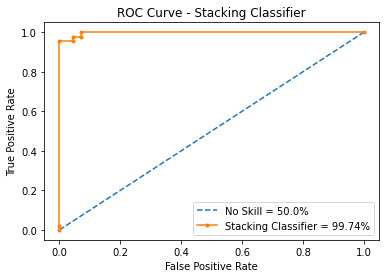

In [87]:
### Plot the ROC Curve

plt.title('ROC Curve - Stacking Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(no_skill_fpr, no_skill_tpr, linestyle = '--', 
         label = 'No Skill = ' + str(round(no_skill_auc * 100, 2)) + '%')
plt.plot(stacking_classifier_fpr, stacking_classifier_tpr, marker = '.', 
         label = 'Stacking Classifier = ' + str(round(stacking_classifier_auc * 100, 2)) + '%')
plt.legend()
plt.show()

### 5. Conclusion

Hence our recommended model - Stacking Classifier provides a model accuracy of 98.25 percent, a model recall of 95.56 percent, and a validation accuracy of 97.6 percent. 